# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
# Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Seaborn style directly
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline


## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [5]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [6]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [7]:
# Aggregate data 
df_aggregated = df.groupby('Year').agg({
    'Global Average Temperature (°C)': 'mean',
    'CO2 Concentration (ppm)': 'mean',
    'Sea Level Rise (mm)': 'mean',
    'Arctic Ice Area (million km²)': 'mean'
}).reset_index()

# Filter the data to span exactly 124 years 
df_aggregated = df_aggregated[(df_aggregated['Year'] >= 1900) & (df_aggregated['Year'] <= 2023)]

#Check that the data contains 124 years
print(df_aggregated)

     Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0    1900                        14.506663               350.373405   
1    1901                        14.485343               349.757140   
2    1902                        14.476262               349.299686   
3    1903                        14.492360               349.644375   
4    1904                        14.494241               349.537032   
..    ...                              ...                      ...   
119  2019                        14.500105               348.642249   
120  2020                        14.496937               350.021731   
121  2021                        14.501424               350.150302   
122  2022                        14.495233               350.493023   
123  2023                        14.474559               351.003294   

     Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0             150.408288                       8.978659  
1             150.548828       

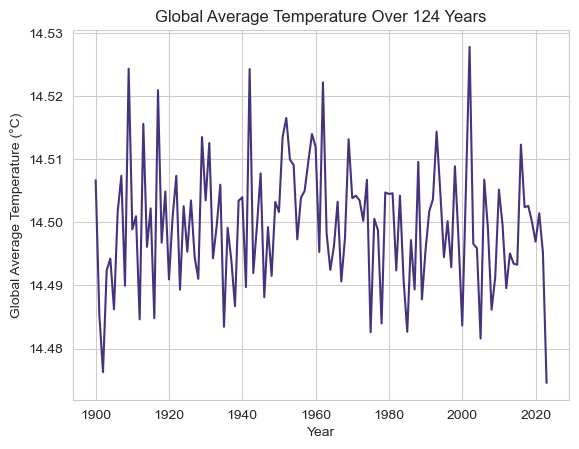

In [9]:
# Visualize one of the time series
plt.plot(df_aggregated['Year'], df_aggregated['Global Average Temperature (°C)'])
plt.xlabel('Year')
plt.ylabel('Global Average Temperature (°C)')
plt.title('Global Average Temperature Over 124 Years')
#plt.grid(True)
plt.show()

## 2. Univariate Analysis

Analyze each climate variable independently.

In [11]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here 

#list columns to analyze
analysis_columns = list(df.columns.difference(['Year']))

print(analysis_columns)

# Descriptive Statistics
print('\nDescriptive Statistics:')
stats = df[analysis_columns].describe().T
stats['Range'] = stats['max'] - stats['min']
print(stats)

['Arctic Ice Area (million km²)', 'CO2 Concentration (ppm)', 'Global Average Temperature (°C)', 'Sea Level Rise (mm)']

Descriptive Statistics:
                                     count        mean        std    min  \
Arctic Ice Area (million km²)    1048576.0    9.000896   3.462551    3.0   
CO2 Concentration (ppm)          1048576.0  350.028018  40.424093  280.0   
Global Average Temperature (°C)  1048576.0   14.499538   0.866101   13.0   
Sea Level Rise (mm)              1048576.0  149.990004  86.576589    0.0   

                                    25%     50%     75%    max  Range  
Arctic Ice Area (million km²)      6.00    9.00   12.00   15.0   12.0  
CO2 Concentration (ppm)          314.99  350.07  385.02  420.0  140.0  
Global Average Temperature (°C)   13.75   14.50   15.25   16.0    3.0  
Sea Level Rise (mm)               74.97  150.02  224.93  300.0  300.0  


Univariate Analysis for Arctic Ice Area (million km²) 
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64
Creating Univariate plots ...


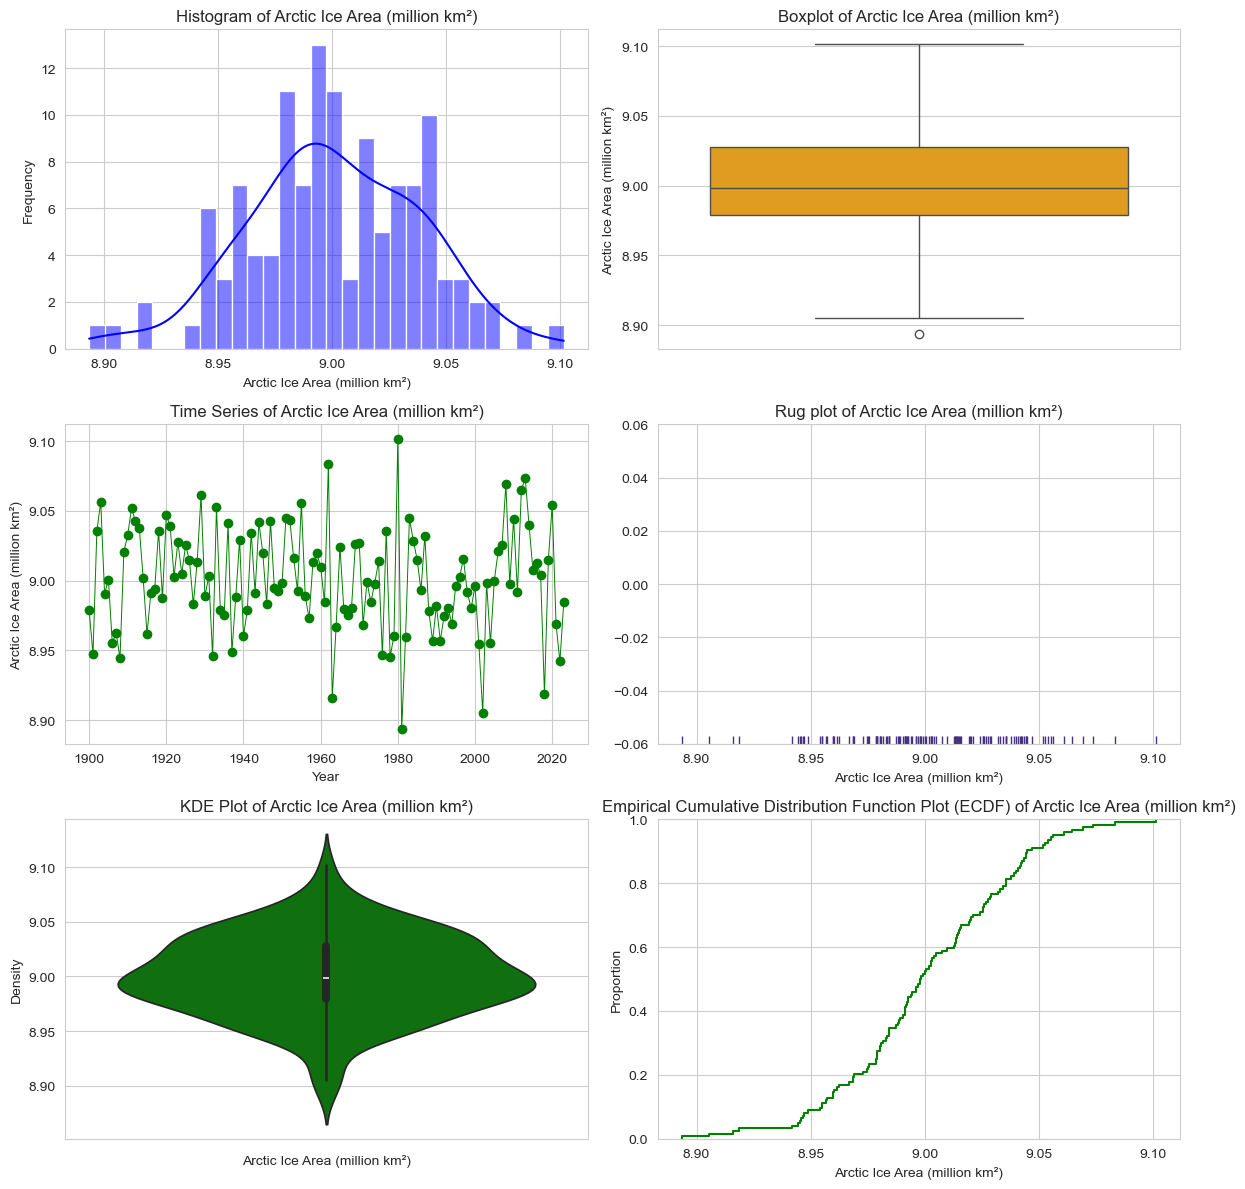

Univariate Analysis for CO2 Concentration (ppm) 
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64
Creating Univariate plots ...


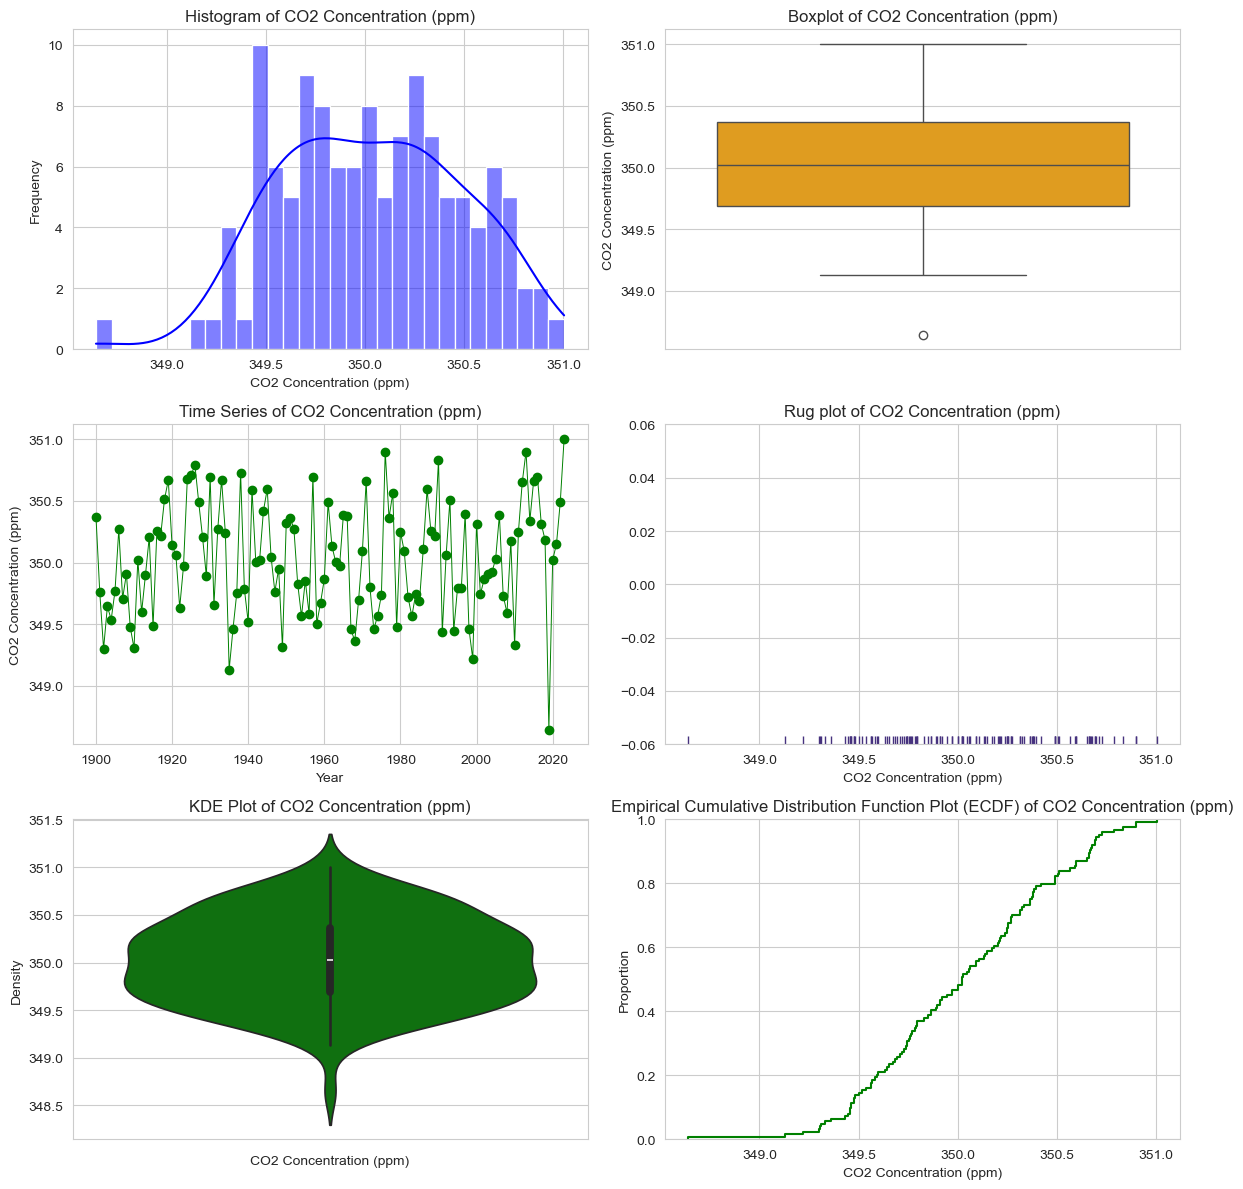

Univariate Analysis for Global Average Temperature (°C) 
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64
Creating Univariate plots ...


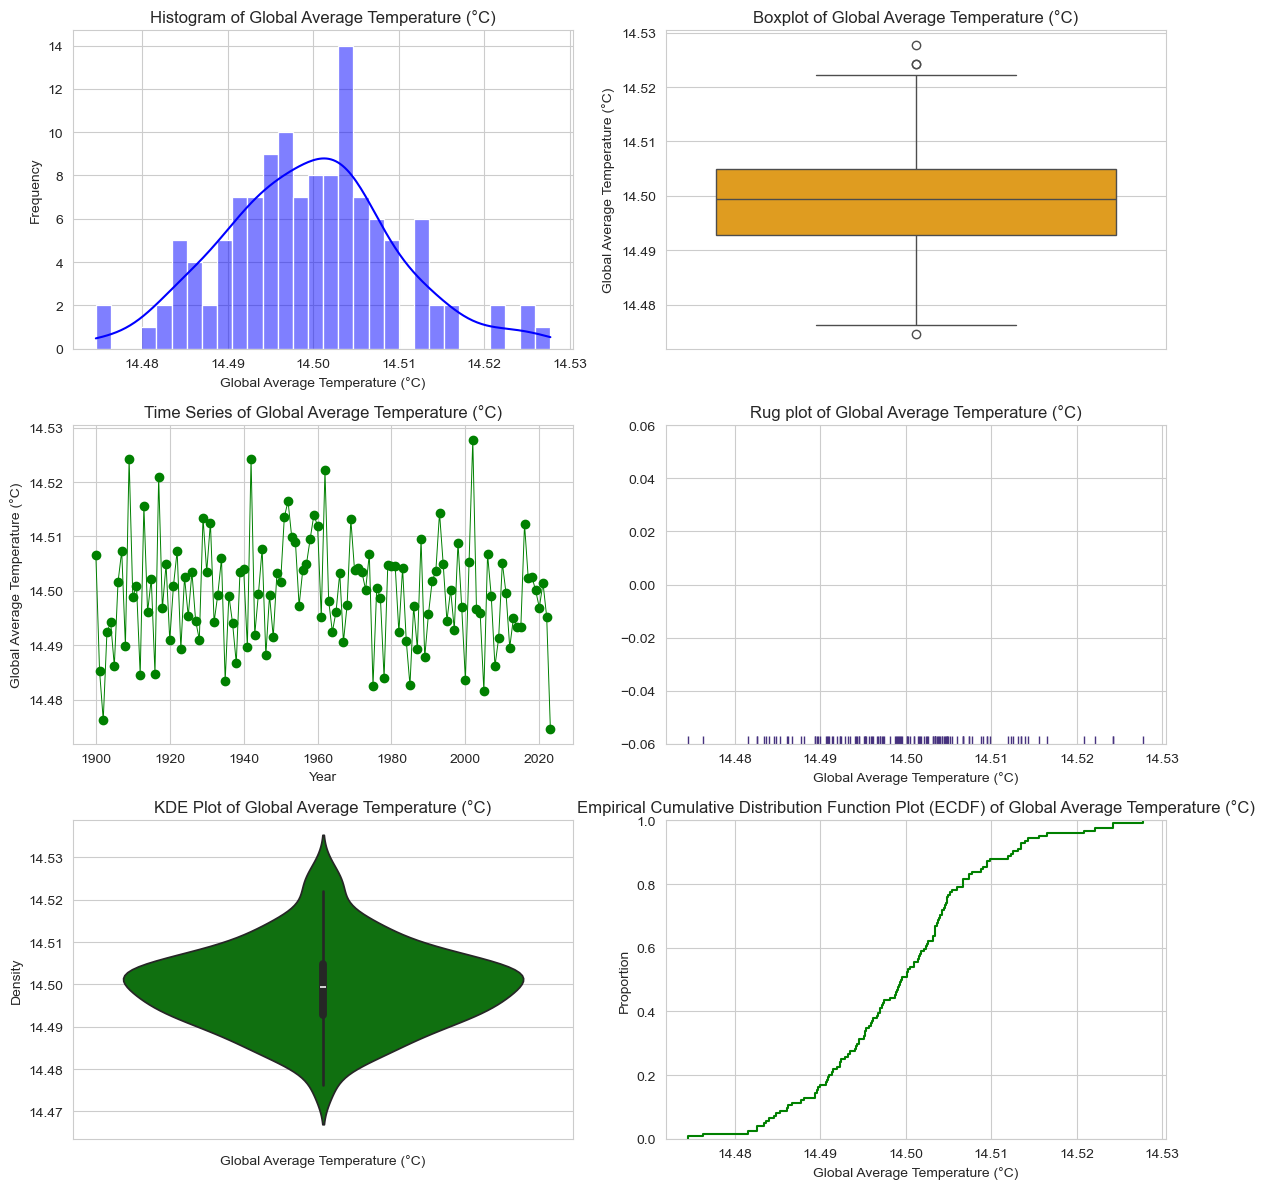

Univariate Analysis for Sea Level Rise (mm) 
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64
Creating Univariate plots ...


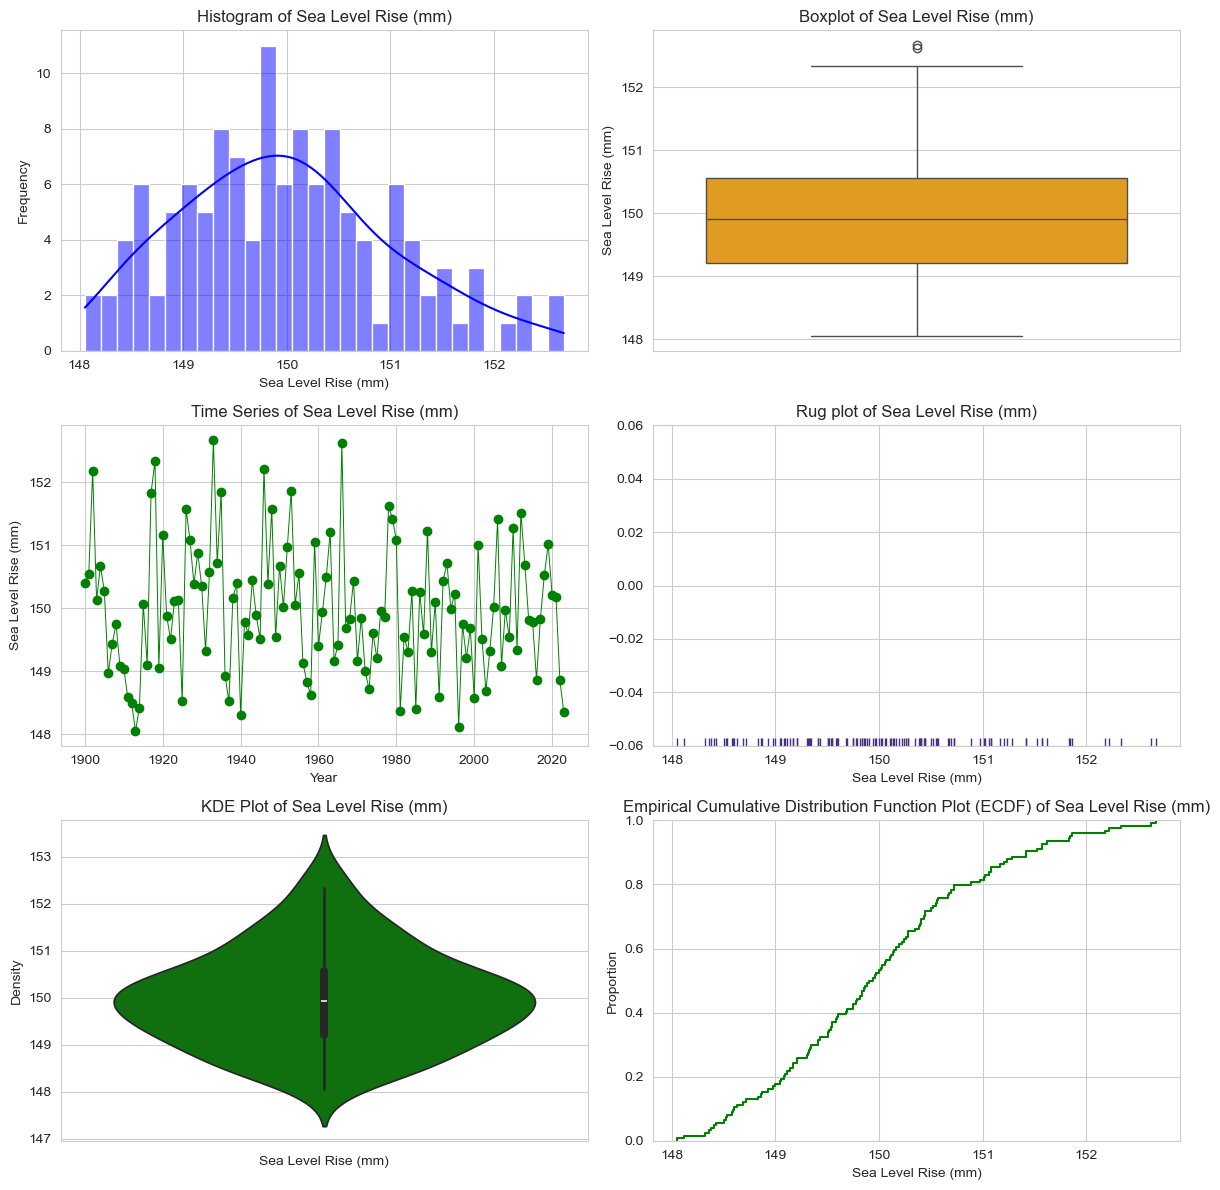

In [12]:
# Visualizations for Univariate Analysis Done For awesome team
def univariate_analysis(df, variables):
    for variable in variables:
        print(f"Univariate Analysis for {variable} ")
        print(df[variable].describe())
        print("Creating Univariate plots ...")

        plt.figure(figsize=(12, 12))
        
        # Histogram
        plt.subplot(3, 2, 1)
        sns.histplot(df[variable], kde=True, color='blue', bins=30)
        plt.title(f"Histogram of {variable}")
        plt.xlabel(variable)
        plt.ylabel("Frequency")
        
        # Box Plot
        plt.subplot(3, 2, 2)
        sns.boxplot(y=df[variable], color='orange')
        plt.title(f"Boxplot of {variable}")
        plt.ylabel(variable)
        
        # Time Series Plot
        plt.subplot(3, 2, 3)
        plt.plot(df['Year'], df[variable], marker='o', color='green', linewidth=0.7)
        plt.title(f"Time Series of {variable}")
        plt.xlabel("Year")
        plt.ylabel(variable)
        plt.grid(True)
        
        # Rug Plot
        plt.subplot(3, 2, 4)
        sns.rugplot(df[variable],)
        plt.title(f"Rug plot of {variable}")
        plt.xlabel(variable)
        plt.grid(True)


        # Violin Plot
        plt.subplot(3, 2, 5)
        sns.violinplot(df[variable],color='green')
        plt.title(f'KDE Plot of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Density')

        # ECDF plot
        plt.subplot(3, 2, 6)
        sns.ecdfplot(df[variable], color='green')
        plt.title(f'Empirical Cumulative Distribution Function Plot (ECDF) of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Proportion')
        
        # Display plots
        plt.tight_layout()
        plt.show()


univariate_analysis(df_aggregated, analysis_columns)

## 3. Bivariate Analysis

In Bivariate analysis, we analyze all pairs of variables for analysis.

In Bivariate analysis, we created plots as :

. Line plots

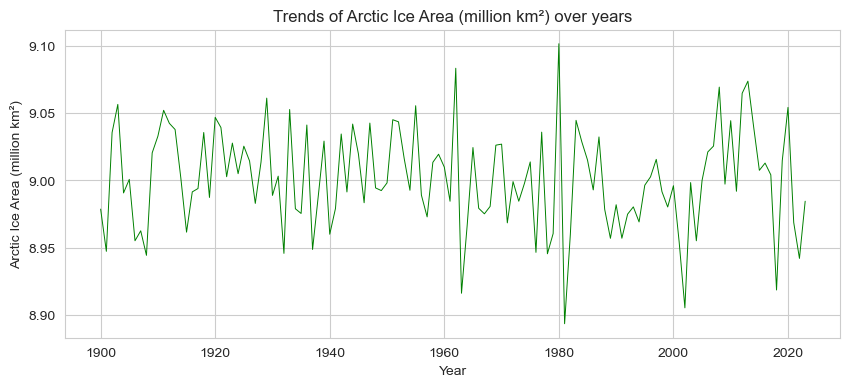

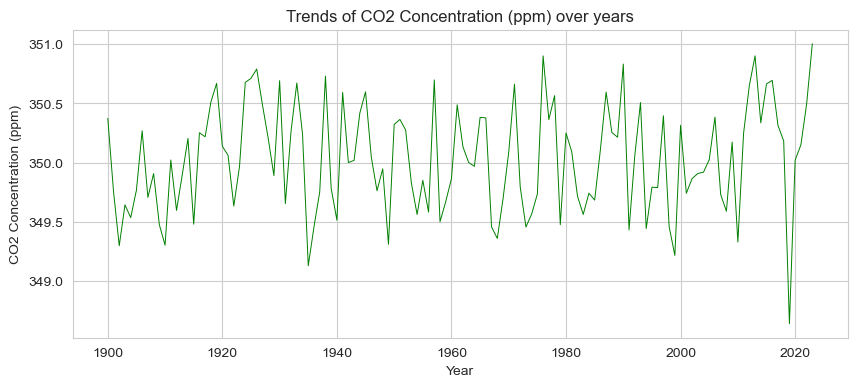

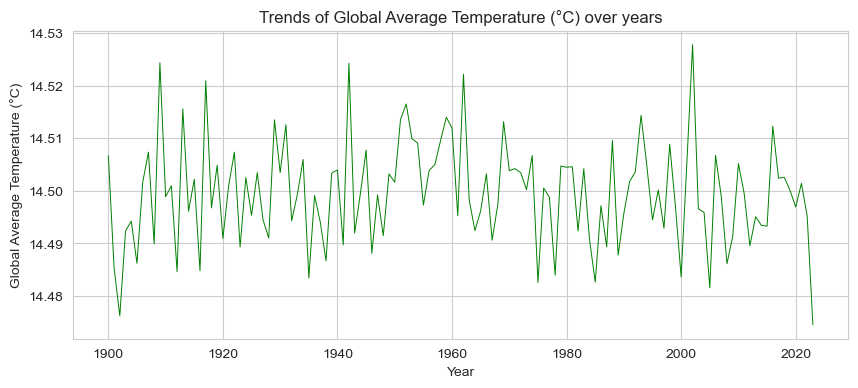

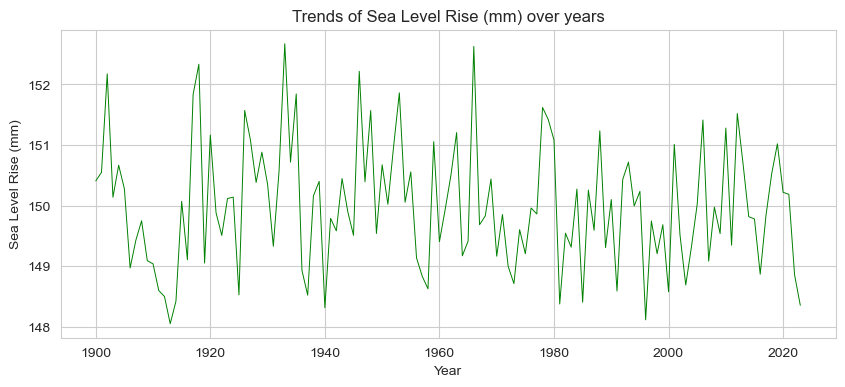

In [13]:
# Visualizations for Line plots
def bivariate_analysis_lineplot(df, variables):
    for variable in variables:
        plt.figure(figsize=(10, 4))
        
        plt.plot(df['Year'], df[variable], color='green', linewidth=0.7)
        plt.title(f"Trends of {variable} over years")
        plt.xlabel("Year")
        plt.ylabel(variable)
        plt.grid(True)
        plt.show()
        
bivariate_analysis_lineplot(df_aggregated, analysis_columns)

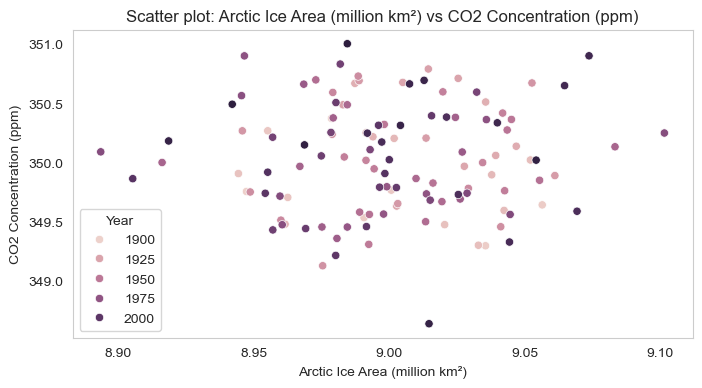

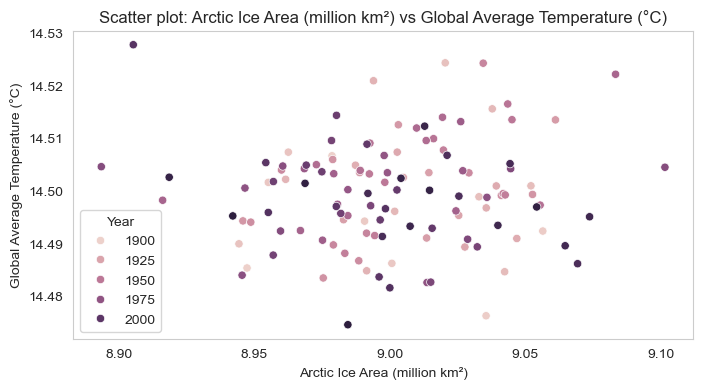

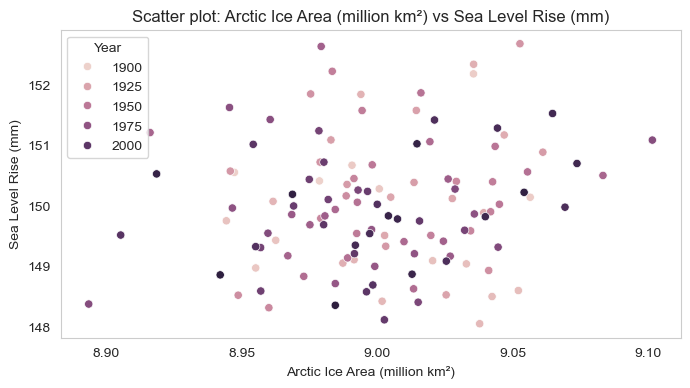

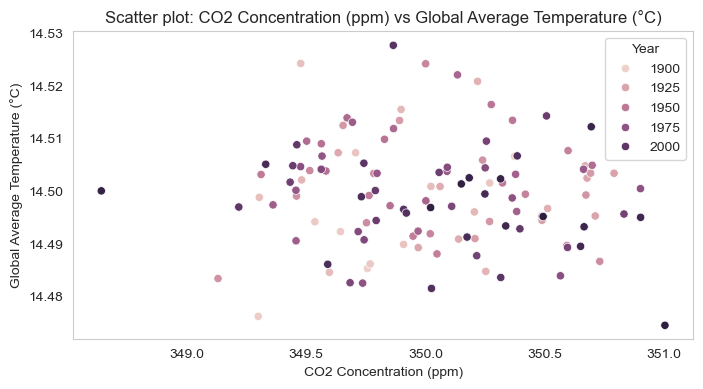

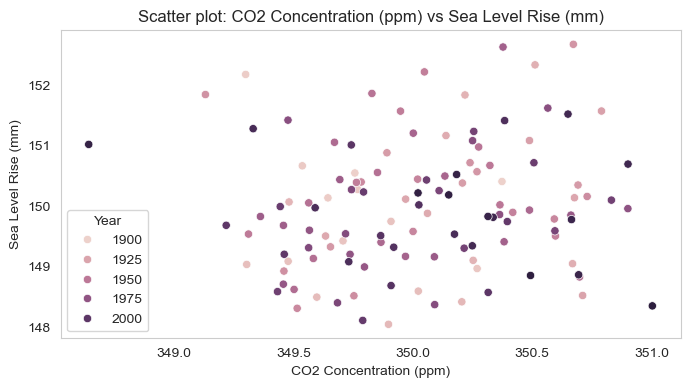

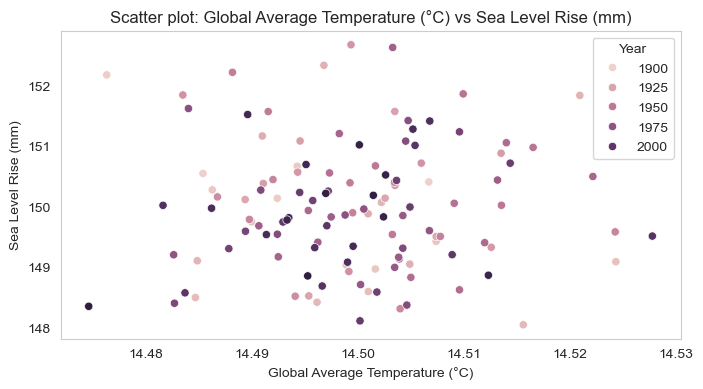

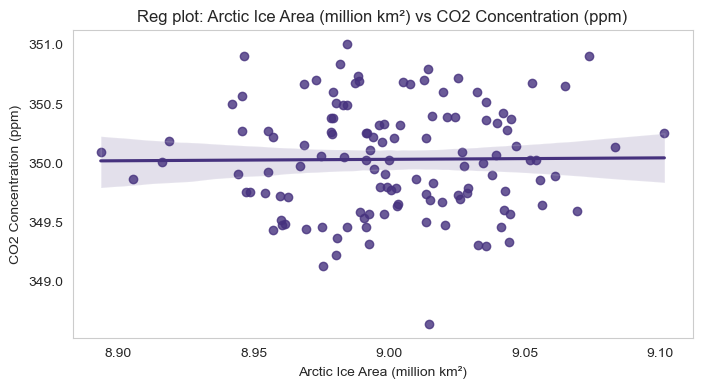

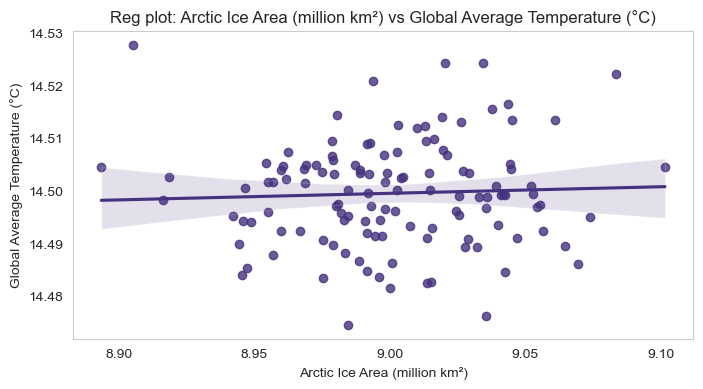

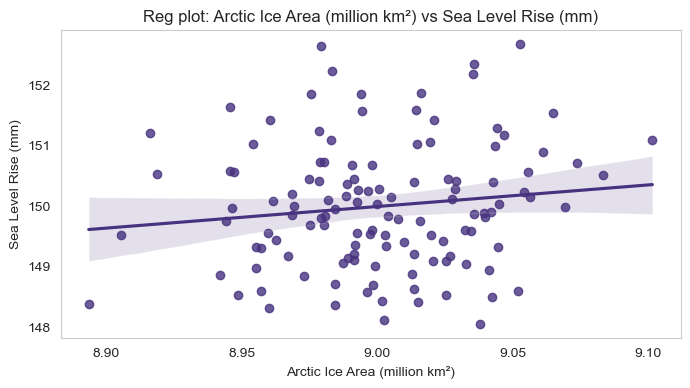

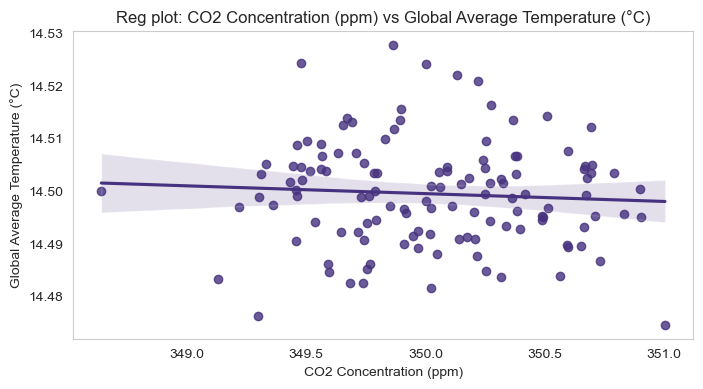

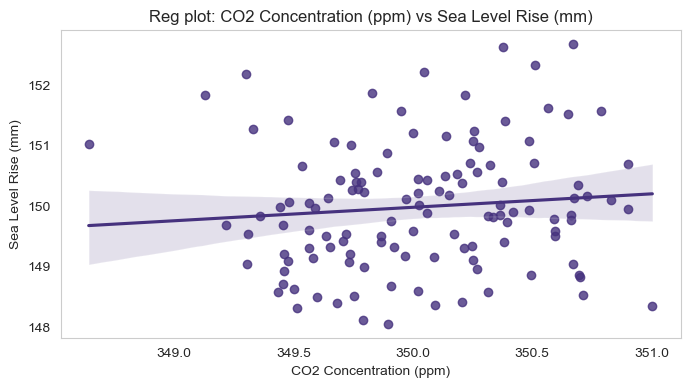

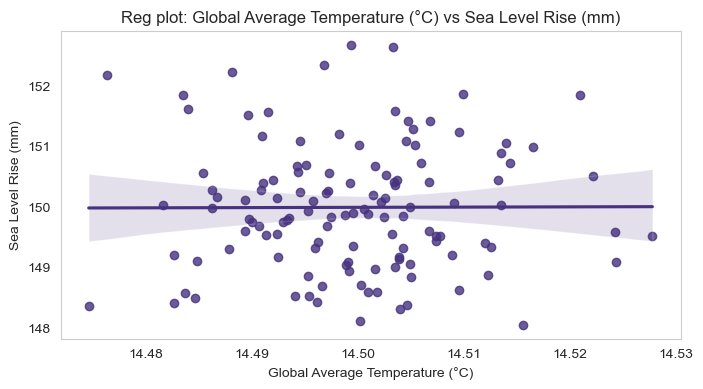

In [ ]:
# For scatter Plots

def bivariate_analysis2(df, variables):
    
    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            plt.figure(figsize=(8, 4))
            sns.scatterplot(x=variables[i], y=variables[j], data=df, hue='Year')
            plt.title(f"Scatter plot: {variables[i]} vs {variables[j]}")
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.grid(False)

            plt.show()

    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            plt.figure(figsize=(8, 4))
            sns.regplot(x=variables[i], y=variables[j], data=df)
            plt.title(f"Reg plot: {variables[i]} vs {variables[j]}")
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.grid(False)

            plt.show()

bivariate_analysis2(df_aggregated, analysis_columns)

Correlation Coefficients:

                                 Global Average Temperature (°C)  \
Global Average Temperature (°C)                         1.000000   
CO2 Concentration (ppm)                                -0.067980   
Sea Level Rise (mm)                                     0.003878   
Arctic Ice Area (million km²)                           0.047027   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Global Average Temperature (°C)                -0.067980             0.003878   
CO2 Concentration (ppm)                         1.000000             0.098212   
Sea Level Rise (mm)                             0.098212             1.000000   
Arctic Ice Area (million km²)                   0.009986             0.129528   

                                 Arctic Ice Area (million km²)  
Global Average Temperature (°C)                       0.047027  
CO2 Concentration (ppm)                               0.009986  
Sea Level Rise (mm)            

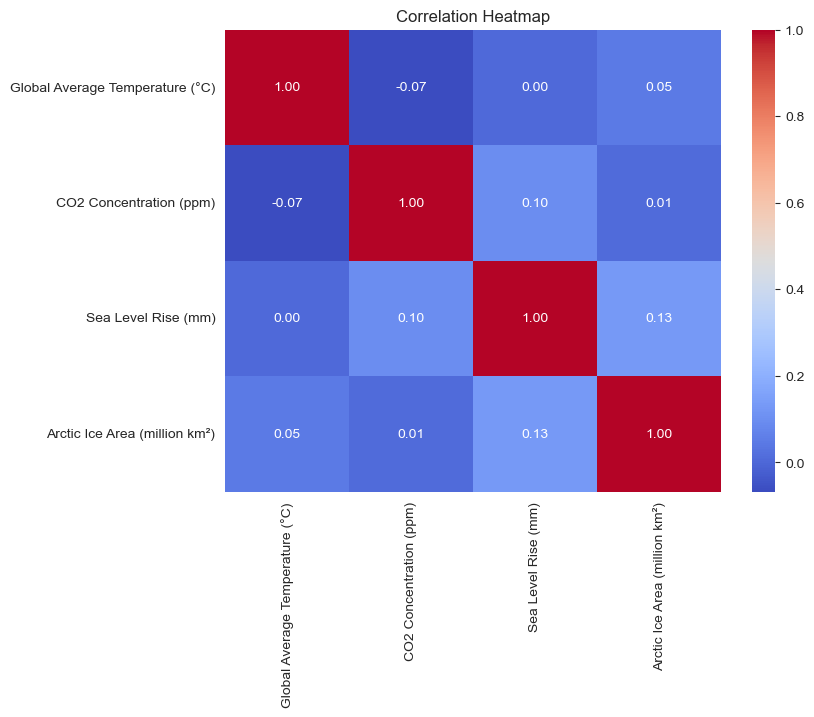

Pair plot for all variable relationships


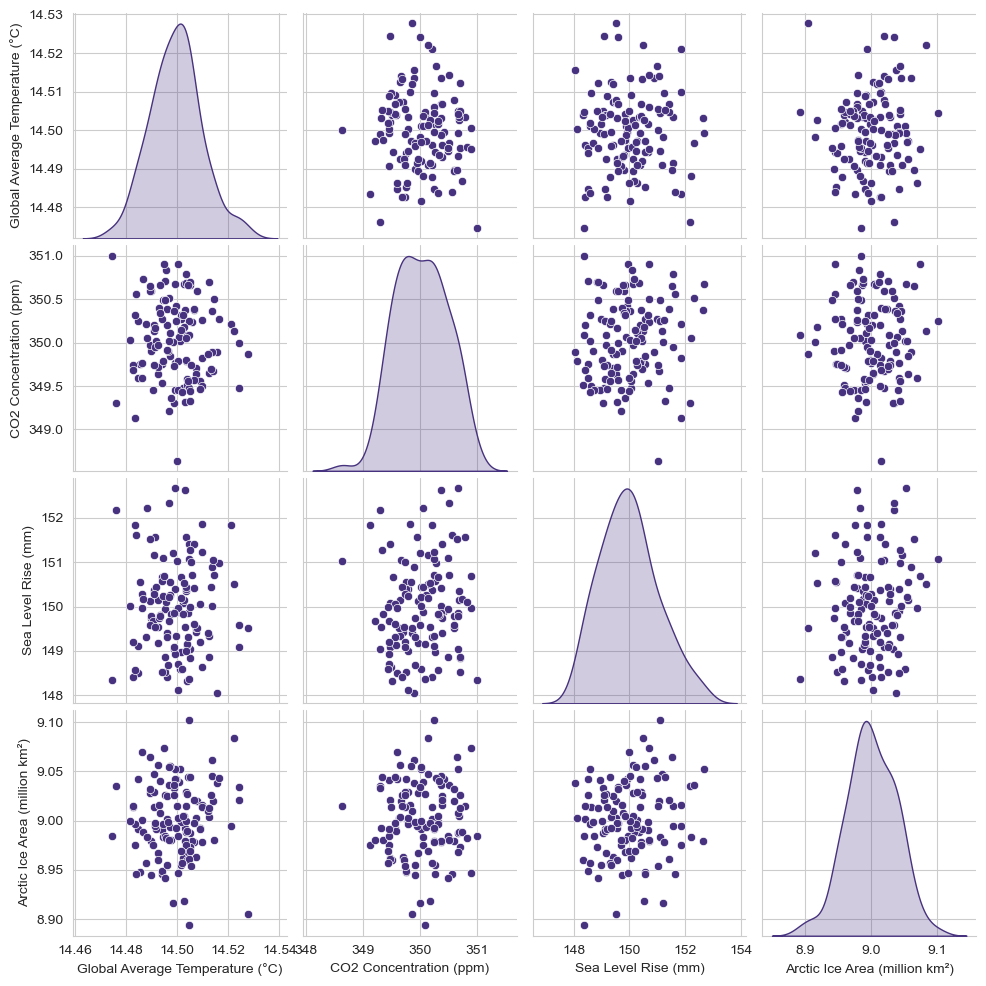

In [16]:
# HeatMap for Bivariate


df_heatmap = df_aggregated.drop(columns=['Year'], errors="ignore")

# Correlation coefficients
correlation_matrix = df_heatmap.corr()
print("Correlation Coefficients:\n")
print(correlation_matrix)


# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

print('Pair plot for all variable relationships')
# Pair plot for all variable relationships
sns.pairplot(df_heatmap, diag_kind='kde')
plt.show()

## Insights From Bivariate Analysis

The analysis shows no clear link between CO₂ levels and Arctic ice area, temperature, or sea level rise. While Arctic ice seems to decrease slightly as temperature rises, the trend is weak. Sea level rise and Arctic ice area appear to be influenced by different factors. Similarly, CO₂ levels don’t strongly correlate with temperature or sea level rise, suggesting other elements affect these changes. The relationship between temperature and sea level rise is also complex, with no clear pattern emerging from the data.